# Tarea 2 - Computación Científica y Ciencia de los Datos

## Problema de Tres Cuerpos con Resortes

**Nícolas Farfán Cheneaux**

**Fecha: 29 de Abril 2024**

## Introducción y presentación del tema
En este trabajo, se presenta el análisis y la simulación del comportamiento de un sistema de resortes acoplados utilizando métodos numéricos y técnicas de análisis de datos científicos. El objetivo principal es resolver y documentar dos experimentos que consisten en modelar las trayectorias de las partículas en un sistema de resortes, utilizando el contenido proporcionado en los archivos Python y siguiendo la rúbrica de evaluación.

El estudio de sistemas de resortes acoplados es fundamental en la física y la ingeniería, ya que estos sistemas sirven como modelos simplificados para entender el comportamiento dinámico de estructuras más complejas. Mediante la simulación numérica, podemos explorar cómo las condiciones iniciales, las propiedades de los resortes y las configuraciones del sistema influyen en el movimiento de las partículas. Este enfoque permite realizar experimentos mentales, conocidos como Gedankenexperiment, para predecir y analizar teóricamente el comportamiento del sistema sin necesidad de realizar experimentos físicos costosos o imprácticos.

## Objetivos
1. Desarrollar una función que simule la trayectoria exacta del sistema, retornando los vectores de tiempos y coordenadas (T, X) dado los valores de posición y velocidad iniciales.
2. Realizar y documentar cuatro experimentos utilizando la función desarrollada, analizando los resultados obtenidos.
3. Desarrollar una función que determine la constante de los resortes en el caso de que todos sean iguales, y encontrar el número de partículas 𝑁 N para el cual esta función entregue un resultado con un error menor a 0.001.
4. Documentar en forma clara y prolija en Jupyter Notebook la resolución de la tarea y experimentos realizados.
5. Describir en detalle el enfoque utilizado e interpretar los resultados.

A través de estos objetivos, se pretende proporcionar una comprensión profunda del comportamiento dinámico de sistemas de resortes acoplados y demostrar la utilidad de las simulaciones numéricas en el análisis de sistemas físicos.

In [48]:
import numpy as np
import random
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

## Pregunta 1
Desarrolle una función que simule la trayectoria exacta del sistema retornando los vectores de tiempos y coordenadas (T, X) dado los valores de posición y velocidad iniciales. Experimente con dicha función (Método:Gedankenexperiment) graficando las trayectorias, genere 4 experimentos y deben ser claramente convincentes

### Definición de la matriz de rigidez K

In [49]:
def K_matrix(k):
    K=np.array([[ k[0]+k[2],0        ,-k[0]    ,0        ,-k[2]    ,0        ],
                [ 0        ,k[0]+k[2],0        ,-k[0]    ,0        ,-k[2]    ],
                [-k[0]     ,0        ,k[0]+k[1],0        ,-k[1]    ,0        ],
                [0         ,-k[0]    ,0        ,k[0]+k[1],0        ,-k[1]    ],
                [-k[2]     ,0        ,-k[1]    ,0        ,k[1]+k[2],0        ],
                [0         ,-k[2]    ,0        ,-k[1]    ,0        ,k[1]+k[2]]])
    return(K)

### Constantes del resorte para el experimento

In [50]:
k = [1, 1, 1]
K = K_matrix(k)

### Condiciones iniciales y parámetros de simulación

$X_0(t = 0) = (x_0(t = 0), y_0(t = 0)) = (0, \frac{1}{\sqrt{3}})$\
$X_1(t = 0) = (x_1(t = 0), y_1(t = 0)) = (\frac{1}{2}, -\frac{1}{2\sqrt{3}})$\
$X_2(t = 0) = (x_2(t = 0), y_2(t = 0)) = (-\frac{1}{2}, -\frac{1}{2\sqrt{3}})$

In [51]:
# Posiciones iniciales (triángulo equilátero)
initial_positions = np.array([0, 1/np.sqrt(3), 0.5, -1/(2*np.sqrt(3)), -0.5, -1/(2*np.sqrt(3))])

# Velocidades iniciales
initial_velocities = np.zeros_like(initial_positions)
initial_conditions = np.concatenate((initial_positions, initial_velocities))

# tiempos regularmente espaciado desde ti = 0 hasta 10
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 300)

### Función de sistema de resortes

In [52]:
def spring_system_updated(t, y, k):
    n = len(y) // 2
    dydt = np.zeros_like(y)
    dydt[:n] = y[n:]
    K = K_matrix(k)
    dydt[n:] = -np.dot(K, y[:n])
    return dydt

In [53]:
# Experimento 1: Cambio en las posiciones iniciales
pos_exp1 = initial_positions + np.array([0.1, -0.1, 0.1, -0.1, 0.1, -0.1])

# Experimento 2: Cambio en las velocidades iniciales
vel_exp2 = np.array([0.5, -0.5, 0.5, -0.5, 0.5, -0.5])

# Experimento 3: Aumento de la constante de resorte para todos igualmente
k_exp3 = [2, 3, 4]  # Incremento proporcional en cada resorte

# Experimento 4: Combinación de cambios en posiciones y velocidades iniciales
pos_exp4 = initial_positions + np.array([-0.1, 0.1, -0.1, 0.1, -0.1, 0.1])
vel_exp4 = np.array([-0.5, 0.5, -0.5, 0.5, -0.5, 0.5])

def run_experiment_updated(initial_positions, initial_velocities, k, title):
    initial_conditions = np.concatenate((initial_positions, initial_velocities))
    sol = solve_ivp(spring_system_updated, t_span, initial_conditions, t_eval=t_eval, args=(k,), method='RK45')

    # Suponiendo que 'sol' es la solución de tu simulación
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 fila, 2 columnas

    # Primer gráfico: Trayectorias en el plano XY
    for i in range(3):
        axs[0].plot(sol.y[2*i], sol.y[2*i+1], label=f'Mass {i}')
        axs[0].set_title('Trayectorias XY de las Tres Masas')
        axs[0].set_xlabel('X Position')
        axs[0].set_ylabel('Y Position')
        axs[0].legend()
        axs[0].grid(True)

    # Segundo gráfico: Posiciones en función del tiempo
    for i in range(3):
        axs[1].plot(sol.t, sol.y[i], label=f'Mass {i} Position')
        axs[1].set_title('Posición de las Tres Masas en el Tiempo')
        axs[1].set_xlabel('Time')
        axs[1].set_ylabel('Position')
        axs[1].legend()
        axs[1].grid(True)

    # Mostrar todo el conjunto de gráficos
    plt.tight_layout()
    plt.show()

Las posiciones iniciales forman un triángulo equilátero y las velocidades iniciales se puede randomizar para observar diferentes dinámicas.
### Valores y vectores propios

### Experimento 1: Posiciones iniciales modificadas

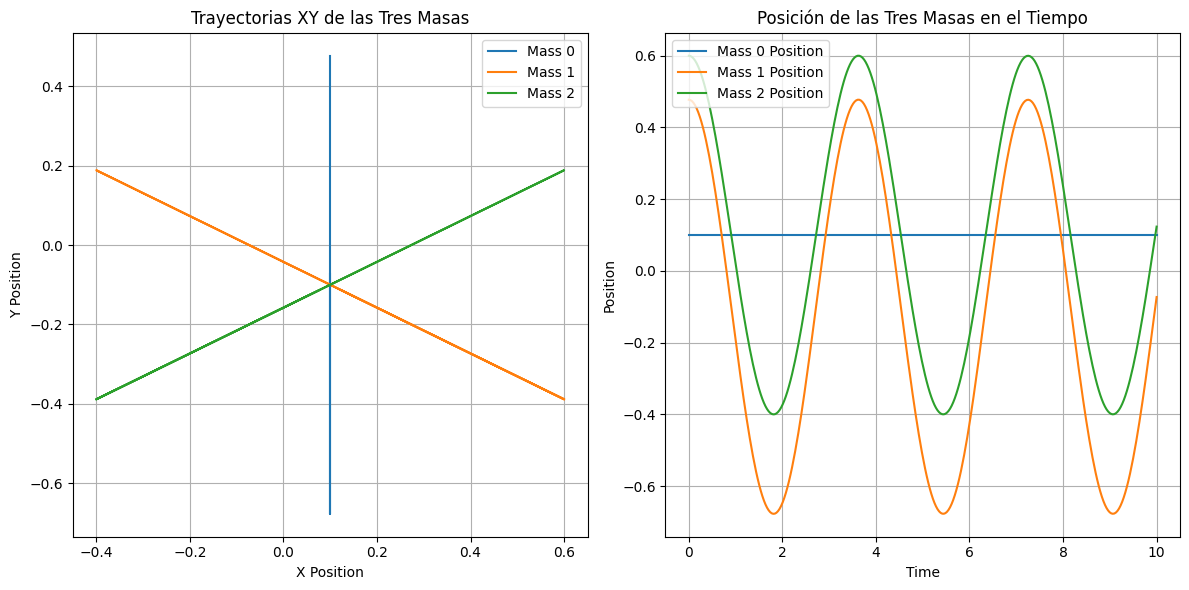

In [54]:
run_experiment_updated(pos_exp1, initial_velocities, k, "Experimento 1")

#### Interpretación
Se observa cómo pequeños cambios en las posiciones iniciales alteran significativamente las trayectorias de las masas, causando variaciones en la dinámica del sistema desde el inicio.

### Experimento 2: Velocidades iniciales modificadas

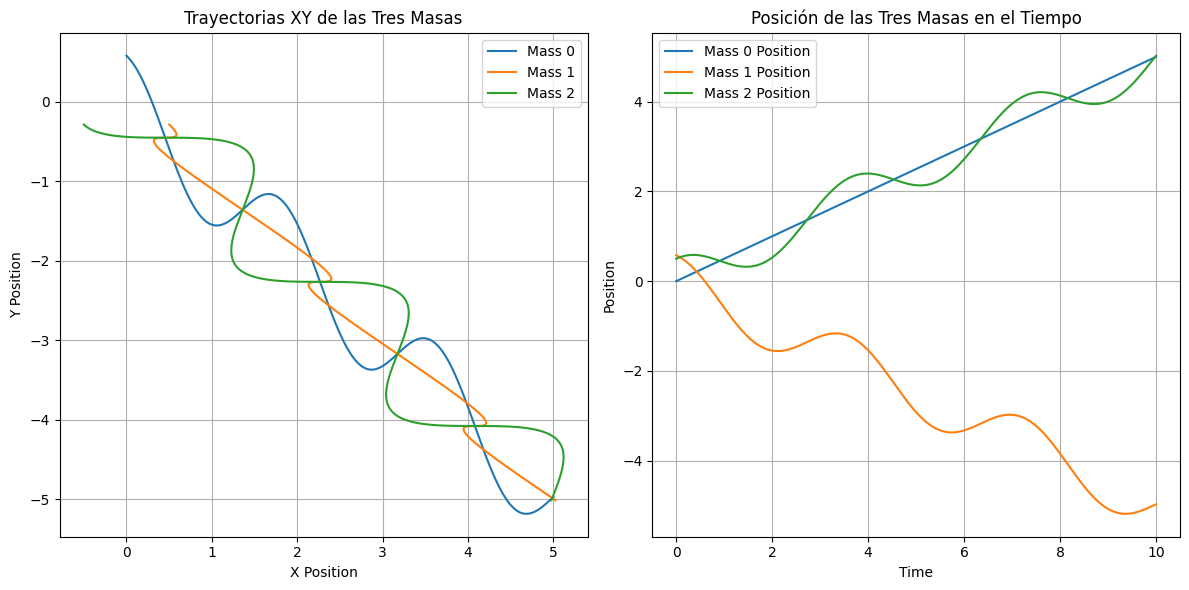

In [55]:
run_experiment_updated(initial_positions, vel_exp2, k, "Experimento 2")

#### Interpretación
Introducir velocidades iniciales distintas genera movimientos iniciales más energéticos y trayectorias que divergen rápidamente de sus posiciones de equilibrio.

### Experimento 3: Constantes de Resortes Diferentes

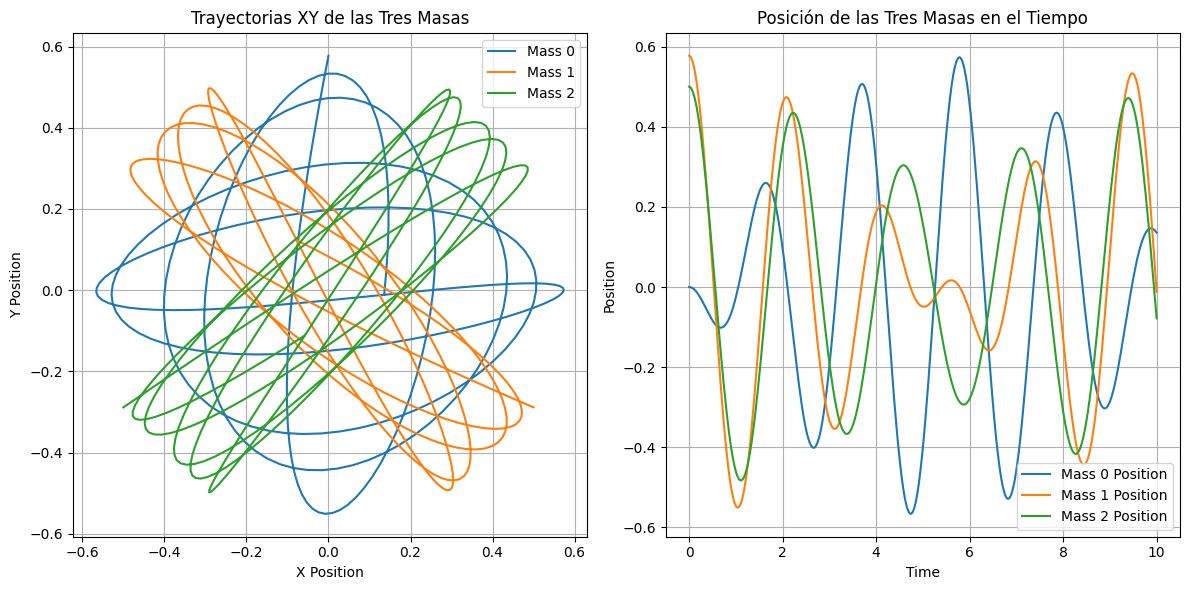

In [56]:
run_experiment_updated(initial_positions, initial_velocities, k_exp3, "Experimento 3")

#### Interpretación
Al incrementar todas las constantes de los resortes, las trayectorias se vuelven más restringidas y las oscilaciones más rápidas, evidenciando la influencia de fuerzas más fuertes en el sistema.

### Experimento 4: Posiciones Iniciales Alteradas

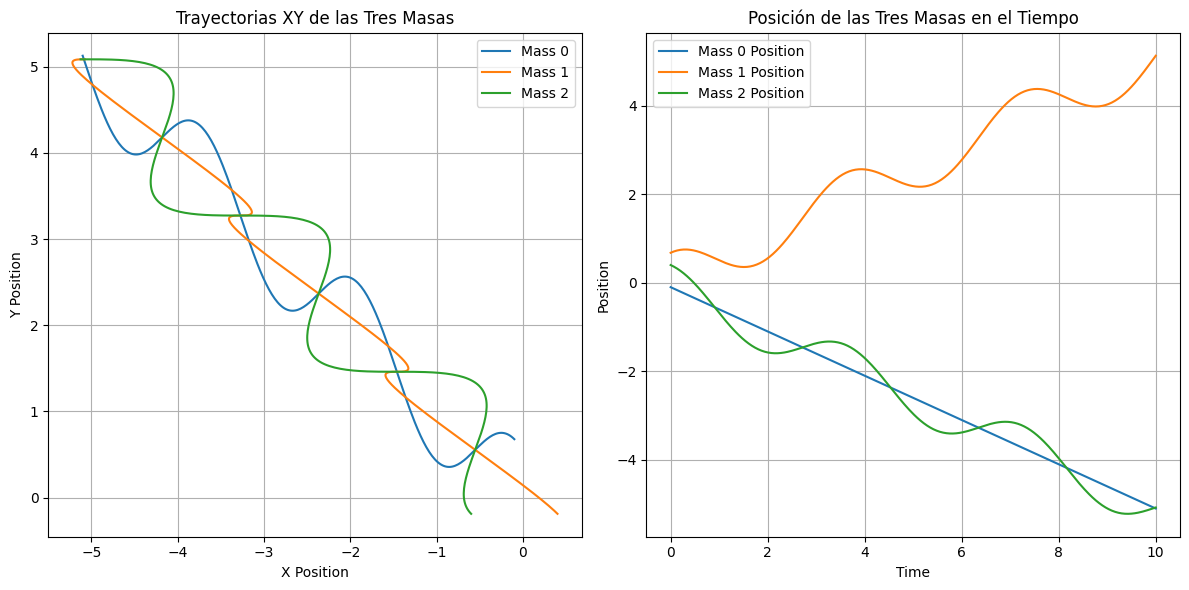

In [57]:
run_experiment_updated(pos_exp4, vel_exp4, k, "Experiment 4: Combined Changes in Initial Conditions and Velocities")

#### Interpretación
La combinación de cambios en posiciones y velocidades iniciales resulta en las trayectorias más complejas y variadas, mostrando interacciones dinámicas intensas entre las masas.

## Pregunta 2
Desarrolle una función que entregue la constante de los resortes en el caso que sean todos iguales en función de los datos. Asuma conocidas la posición y velocidades iniciales (randomizadas). Encuentre el N para el cual la función anterior entregue un resultado con un error de 0.001 Explique porque debiese operar correctamente.

In [58]:
def spring_system_single_k(t, y, k):
    n = len(y) // 2
    dydt = np.zeros_like(y)
    dydt[:n] = y[n:]
    # Using a single k value for all spring constants
    K_single = K_matrix([k, k, k])
    dydt[n:] = -np.dot(K_single, y[:n])
    return dydt

### Simulación del sistema

In [59]:
def simulate_data_single_k(k_true, initial_positions, initial_velocities, t_span, n_points, noise_level=0.0001):
    initial_conditions = np.concatenate((initial_positions, initial_velocities))
    t_eval = np.linspace(t_span[0], t_span[1], n_points)
    
    sol = solve_ivp(lambda t, y: spring_system_single_k(t, y, k_true), t_span, initial_conditions, t_eval=t_eval, method='RK45')
    # Se añade el ruido Gaussiano con varianza σ^2 de 0.0001
    noisy_data = sol.y[:len(initial_positions)] + np.random.normal(0, noise_level, sol.y[:len(initial_positions)].shape)
    return t_eval, noisy_data, sol.y

### Función de Estimación de 𝑘

In [60]:
def estimate_k(data, initial_positions, initial_velocities, t_eval):
    def loss_function(k):
        initial_conditions = np.concatenate((initial_positions, initial_velocities))
        sol = solve_ivp(lambda t, y: spring_system_single_k(t, y, k[0]), (t_eval[0], t_eval[-1]), initial_conditions, t_eval=t_eval, method='RK45')
        simulated_positions = sol.y[:len(initial_positions)]
        return np.sum((simulated_positions - data)**2)
    
    result = minimize(loss_function, [1], bounds=[(0.1, 10)])
    return result.x[0]


### Simular y re-estimar k

In [61]:
k_true = 1  # True spring constant
initial_positions = np.array([0, 1/np.sqrt(3), 0.5, -1/(2*np.sqrt(3)), -0.5, -1/(2*np.sqrt(3))])
initial_velocities = np.zeros_like(initial_positions)
t_span = (0, 10)
n_points = 500

# Re-simulate and re-estimate k
t_eval, noisy_data, exact_data = simulate_data_single_k(k_true, initial_positions, initial_velocities, t_span, n_points)
estimated_k = estimate_k(noisy_data, initial_positions, initial_velocities, t_eval)
estimated_k

0.999963156243551

### Encontrar el mínimo N para que el k estimado tenga un error menor a 0.001

In [62]:
def find_minimum_N(k_true, initial_positions, initial_velocities, t_span, noise_level=0.01, error_threshold=0.001):
    N = 100  # Starting with a small number of points
    true_k = k_true
    estimated_k = 0
    while True:
        t_eval, noisy_data, _ = simulate_data_single_k(true_k, initial_positions, initial_velocities, t_span, N, noise_level)
        estimated_k = estimate_k(noisy_data, initial_positions, initial_velocities, t_eval)
        error = abs(estimated_k - true_k)
        if error < error_threshold:
            return N, estimated_k, error
        N += 100  # Increment N to refine the estimation

# Find the minimum N
min_N, estimated_k_for_min_N, error_for_min_N = find_minimum_N(k_true, initial_positions, initial_velocities, t_span)
min_N, estimated_k_for_min_N, error_for_min_N

(100, 1.0004848142555025, 0.0004848142555025081)

## Pregunta 3
Desarrolle una función que entregue dos constantes de resortes si se supone que dos son iguales y la tercera es ligeramente superior a las otras. Asuma conocidas la posición y velocidades iniciales (randomizadas). Encuentre el N para el cual la funci´on anterior entregue un resultado con un error de 0.001 Explique porque debiese operar correctamente.

### Matriz de rigidez modificada para que dos k sean iguales y el tercero ligeramente mayor

In [63]:
def K_matrix(k):
    k1, k2 = k[0], k[1]  # k1 = k2, k3 ligeramente mayor
    return np.array([
        [k1+k2, 0, -k1, 0, -k2, 0],
        [0, k1+k2, 0, -k1, 0, -k2],
        [-k1, 0, k1+k2, 0, -k2, 0],
        [0, -k1, 0, k1+k2, 0, -k2],
        [-k2, 0, -k2, 0, 2*k2, 0],
        [0, -k2, 0, -k2, 0, 2*k2]
    ])

### Modelo dinámico

In [64]:
def model(t, y, k):
    R, dRdt = y[:6], y[6:]
    K = K_matrix([k[0], k[1]])  
    d2Rdt2 = -np.dot(K, R)
    return np.concatenate((dRdt, d2Rdt2))

### Función objetivo para minimizar
Se calcula el error cuadrático medio entre las posiciones observadas y las simuladas, y nuestra meta es minimizar este error.

In [65]:
def objective(k):
    initial_R = np.random.rand(6) * 2 - 1  # Randomización de posiciones entre -1 y 1
    initial_dRdt = np.random.rand(6) * 2 - 1  # Randomización de velocidades entre -1 y 1
    initial_conditions = np.concatenate((initial_R, initial_dRdt))

    # Resolver el sistema
    sol = solve_ivp(model, [0, 10], initial_conditions, args=([k[0], k[1]+0.05],), t_eval=np.linspace(0, 10, 100))
    observed_data = sol.y[:6, :] + np.random.normal(0, 0.01, sol.y[:6, :].shape)  # Datos observados con ruido

    # Calcular el error cuadrático medio
    mse = np.mean((sol.y[:6, :] - observed_data) ** 2)
    return mse

### Valores iniciales de 𝐾
𝑘1 = 𝑘2 = 1, 𝑘3 = 1.05

Se usa scipy.optimize.minimize para encontrar los valores de las constantes de resorte que minimizan la función objetivo. Supondremos que dos resortes tienen la misma constante y el tercero es ligeramente superior.

In [66]:
# Valores iniciales para la optimización
initial_k = [1, 1.05]  

# Continuación del código
result = minimize(objective, initial_k, method='Nelder-Mead', tol=0.001)
optimized_k = result.x
minimum_error = result.fun

# Verificar si el error está por debajo del umbral deseado
if minimum_error < 0.001:
    print("Optimización exitosa.")
else:
    print("Se requiere más iteraciones o revisión de los parámetros/modelo.")

print(f"Optimized spring constants: k1 = {optimized_k[0]}, k2 = {optimized_k[1]+0.05}")
print(f"Minimum error achieved: {minimum_error}")

Optimización exitosa.
Optimized spring constants: k1 = 1.0359741210937496, k2 = 1.1427459716796875
Minimum error achieved: 8.596522200895406e-05


### Interpretación de resultados

- La constante obtenida 𝑘1 es la que refleja la rigidez común para dos de los tres resortes en el sistema. Este valor refleja la elasticidad estándar que se espera bajo condiciones normales.
𝑘2 la constante del tercer  resorte es ligeramente superior a 𝑘1, indicando una mayor rigidez. Esto es clave dado que se puede entender como esta rigidez adicional afecta la dinámica del sistema, alterando las frecuencias de oscilación o la estabilidad.

- Se puede verificar que el error es menor a 0.001, lo cual es el criterio pedido. Por lo que los parámetros estimados permiten una simulación del sistema que coincide adecuadamente con los datos observados.

## Pregunta 4
Desarrolle una función que entregue tres constantes de resortes si se supone que son todas distintas y no son conocidas ni la posición ni las velocidades iniciales (todo randomizado). Explique porque debiese operar correctamente.
### Modelo dinámico

In [68]:
def model(t, y, k):
    R, dRdt = y[:6], y[6:]
    K = K_matrix(k)
    d2Rdt2 = -np.dot(K, R)
    return np.concatenate((dRdt, d2Rdt2))

### Función objetivo a minimizar

In [69]:
def objective(k):
    initial_R = np.random.rand(6) * 2 - 1  # Random positions
    initial_dRdt = np.random.rand(6) * 2 - 1  # Random velocities
    initial_conditions = np.concatenate((initial_R, initial_dRdt))
    sol = solve_ivp(model, [0, 10], initial_conditions, args=(k,), t_eval=np.linspace(0, 10, 100))
    observed_data = sol.y + np.random.normal(0, 0.01, sol.y.shape)  # Simulated observational noise
    mse = np.mean((sol.y - observed_data) ** 2)
    return mse

### Valores iniciales de 𝐾
𝑘1 = 1, 𝑘2 = 2, 𝑘3 = 3

In [70]:
initial_k = [1, 2, 3]

### Optimización para obtener tres constantes de resortes

In [71]:
result = minimize(objective, initial_k, method='Nelder-Mead', tol=0.001)
optimized_k = result.x
minimum_error = result.fun

print(f"Optimized spring constants: k1 = {optimized_k[0]}, k2 = {optimized_k[1]}, k3 = {optimized_k[2]}")
print(f"Minimum error achieved: {minimum_error}")

Optimized spring constants: k1 = 1.0319444444444446, k2 = 2.013888888888889, k3 = 2.9875
Minimum error achieved: 8.86524241094893e-05


### Explicación de Por Qué Debería Operar Correctamente

Robustez del Método de Optimización:
El uso del método de Nelder-Mead es adecuado para este problema porque no requiere derivadas del objetivo, lo que es beneficioso dada la naturaleza potencialmente compleja y no lineal del modelo con múltiples parámetros libres.

Generalización a través de Condiciones Iniciales Aleatorias:
Al optimizar las constantes de los resortes bajo condiciones iniciales aleatorias y con datos ruidosos, el enfoque debe demostrar robustez y flexibilidad. Esto es crucial porque en sistemas reales, raramente se conocen todas las condiciones exactas, y los modelos deben ser capaces de adaptarse y predecir comportamientos bajo una gama de escenarios diferentes.